# Analyzing the NYC Subway Dataset

## Wrangling Subway Data

In [1]:
#get the csv file
filename="weather_underground.csv"

##### Number of Rainy Days....

In [2]:
#import modules
import pandas 
import pandasql

In [3]:
def num_rainy_days(filename):
    '''
    This function should run a SQL query on a dataframe of
    weather data.  
    Return: (one column,one row) - a count of the number of days where
            the rain column is equal to 1.  
    
    You might also find that interpreting numbers as integers or floats may not
    work initially.  In order to get around this issue, it may be useful to cast
    these numbers as integers.  This can be done by writing cast(column as integer).
    So for example, if we wanted to cast the maxtempi column as an integer, we would actually
    write something like where cast(maxtempi as integer) = 76, as opposed to simply 
    where maxtempi = 76.
    
    '''
    
    weather_data=pandas.read_csv(filename)
    
    q="""SELECT SUM(rain) from weather_data"""
    
    rainy_days=pandasql.sqldf(q.lower(),locals())
    return rainy_days


print num_rainy_days(filename)
    

   sum(rain)
0         10


##### Temp on Foggy and Non Foggy days....

In [4]:
def max_temp_aggregate_by_fog(filename):
    '''
    This function should run a SQL query on a dataframe of
    weather data.
    Return:(two columns and two rows) - whether it was foggy or not (0 or 1) and the max
    maxtempi for that fog value .
    
    You might also find that interpreting numbers as integers or floats may not
    work initially.  In order to get around this issue, it may be useful to cast
    these numbers as integers.  This can be done by writing cast(column as integer).
    So for example, if we wanted to cast the maxtempi column as an integer, we would actually
    write something like where cast(maxtempi as integer) = 76, as opposed to simply 
    where maxtempi = 76.
    '''
    
    weather_data=pandas.read_csv(filename)
    
    q="""SELECT fog,max(cast(maxtempi as integer)) FROM weather_data GROUP BY fog"""
    
    foggy_days=pandasql.sqldf(q.lower(),locals())
    
    return foggy_days


print max_temp_aggregate_by_fog(filename)
    

   fog  max(cast(maxtempi as integer))
0    0                              86
1    1                              81


##### Mean temp on weekends....

In [5]:
def avg_weekend_temp(filename):
    '''
    This function should run a SQL query on a dataframe of
    weather data.  
    Return:(one column ,one row) - the average meantempi on days that are a Saturday or Sunday.
    
    You might also find that interpreting numbers as integers or floats may not
    work initially.  In order to get around this issue, it may be useful to cast
    these numbers as integers.  This can be done by writing cast(column as integer).
    So for example, if we wanted to cast the maxtempi column as an integer, we would actually
    write something like where cast(maxtempi as integer) = 76, as opposed to simply 
    where maxtempi = 76.
    
    Also, you can convert dates to days of the week via the 'strftime' keyword in SQL.
    For example, cast (strftime('%w', date) as integer) will return 0 if the date
    is a Sunday or 6 if the date is a Saturday.
    '''
    
    weather_data=pandas.read_csv(filename)
    
    q="""SELECT avg(cast(meantempi as integer))
         FROM weather_data
         where cast(strftime('%w',date) as integer) in (0,6)
      """
    
    mean_temp_weekends=pandasql.sqldf(q.lower(),locals())
    
    return mean_temp_weekends

print avg_weekend_temp(filename)

   avg(cast(meantempi as integer))
0                        65.111111


##### Mean temp on Rainy Days....

In [6]:
def avg_mean_temperature(filename):
    '''
    This function should run a SQL query on a dataframe of
    weather data.
    Return:  average minimum temperature on rainy days where the minimum temperature is greater than 55 degrees.
    
    You might also find that interpreting numbers as integers or floats may not
    work initially.  In order to get around this issue, it may be useful to cast
    these numbers as integers.  This can be done by writing cast(column as integer).
    So for example, if we wanted to cast the maxtempi column as an integer, we would actually
    write something like where cast(maxtempi as integer) = 76, as opposed to simply 
    where maxtempi = 76.
    '''
    
    weather_data=pandas.read_csv(filename)
    
    q="""SELECT avg(cast(mintempi as integer)) 
         FROM weather_data
         WHERE rain=1 and cast(mintempi as integer)>55
      """
    
    avg_min_temp_rainy=pandasql.sqldf(q.lower(),locals())
    
    return avg_min_temp_rainy

print avg_mean_temperature(filename)

   avg(cast(mintempi as integer))
0                           61.25


##### Fixing Turnstile Data....

In [8]:
import csv
filename="turnstile_110528.txt"

In [10]:
def fix_turnstile_data(filenames):
    '''
    Filenames is a list of MTA Subway turnstile text files.
    
    As you can see, there are numerous data points included in each row of the
    a MTA Subway turnstile text file. 

    You want to write a function that will update each row in the text
    file so there is only one entry per row. A few examples below:
    A002,R051,02-00-00,05-28-11,00:00:00,REGULAR,003178521,001100739
    A002,R051,02-00-00,05-28-11,04:00:00,REGULAR,003178541,001100746
    A002,R051,02-00-00,05-28-11,08:00:00,REGULAR,003178559,001100775
    
    Write the updates to a different text file in the format of "updated_" + filename.
    For example:
        1) if you read in a text file called "turnstile_110521.txt"
        2) you should write the updated data to "updated_turnstile_110521.txt"

    '''
    
    for name in filenames:
        output_filename='updated_'+name
        with open(name) as r:
            reader=csv.reader(r)
            with open(output_filename,'w') as of:
                writer=csv.writer(of)
                for row in reader:
                    writer.writerows(row[:3]+row[i:i+5] for i in range(3,len(row),5))
                    
fix_turnstile_data(['turnstile_110528.txt','turnstile_110604.txt'])                    
    

##### Combining Turnstile Data....

In [11]:
def create_master_turnstile_data(filenames,output_file):
    '''
    Write a function that takes the files in the list filenames, which all have the 
    columns 'C/A, UNIT, SCP, DATEn, TIMEn, DESCn, ENTRIESn, EXITSn', and consolidates
    them into one file located at output_file.  There should be ONE row with the column
    headers, located at the top of the file. The input files do not have column header
    rows of their own.
    
    For example, if file_1 has:
    line 1 ...
    line 2 ...
    
    and another file, file_2 has:
    line 3 ...
    line 4 ...
    line 5 ...
    
    We need to combine file_1 and file_2 into a master_file like below:
     'C/A, UNIT, SCP, DATEn, TIMEn, DESCn, ENTRIESn, EXITSn'
    line 1 ...
    line 2 ...
    line 3 ...
    line 4 ...
    line 5 ...
    '''
    
    with open(output_file,'w') as master_file:
        master_file.write('C/A, UNIT, SCP, DATEn, TIMEn, DESCn, ENTRIESn, EXITSn\n')
        for filename in filenames:
            with open(filename) as f:
                for line in f:
                    master_file.write(line)
                    
create_master_turnstile_data(['updated_turnstile_110528.txt','updated_turnstile_110604.txt'],'master_file.txt')                    
                    

##### Filtering Irregular Data....

In [13]:
master_filename='turnstile_data_master.csv'

In [14]:
def filter_by_regular(filename):
    '''
    This function should read the csv file located at filename into a pandas dataframe,
    and filter the dataframe to only rows where the 'DESCn' column has the value 'REGULAR'.
    
    For example, if the pandas dataframe is as follows:
    ,C/A,UNIT,SCP,DATEn,TIMEn,DESCn,ENTRIESn,EXITSn
    0,A002,R051,02-00-00,05-01-11,00:00:00,REGULAR,3144312,1088151
    1,A002,R051,02-00-00,05-01-11,04:00:00,DOOR,3144335,1088159
    2,A002,R051,02-00-00,05-01-11,08:00:00,REGULAR,3144353,1088177
    3,A002,R051,02-00-00,05-01-11,12:00:00,DOOR,3144424,1088231
    
    The dataframe will look like below after filtering to only rows where DESCn column
    has the value 'REGULAR':
    0,A002,R051,02-00-00,05-01-11,00:00:00,REGULAR,3144312,1088151
    2,A002,R051,02-00-00,05-01-11,08:00:00,REGULAR,3144353,1088177
    '''
    
    turnstile_data=pandas.read_csv(filename)
    turnstile_data=turnstile_data[turnstile_data['DESCn']=='REGULAR']
    return turnstile_data

print filter_by_regular(master_filename).head()
    
    

    C/A  UNIT       SCP     DATEn     TIMEn    DESCn  ENTRIESn   EXITSn
0  A002  R051  02-00-00  05-01-11  00:00:00  REGULAR   3144312  1088151
1  A002  R051  02-00-00  05-01-11  04:00:00  REGULAR   3144335  1088159
2  A002  R051  02-00-00  05-01-11  08:00:00  REGULAR   3144353  1088177
3  A002  R051  02-00-00  05-01-11  12:00:00  REGULAR   3144424  1088231
4  A002  R051  02-00-00  05-01-11  16:00:00  REGULAR   3144594  1088275


##### Get hourly Entries....

In [20]:
df=pandas.read_csv('turnstile_data_master_subset_regular.csv')

In [21]:
def hourly_entries(df):
    '''
    The data in the MTA Subway Turnstile data reports on the cumulative
    number of entries and exits per row.  Assume that you have a dataframe
    called df that contains only the rows for a particular turnstile machine
    (i.e., unique SCP, C/A, and UNIT).  This function should change
    these cumulative entry numbers to a count of entries since the last reading
    (i.e., entries since the last row in the dataframe).
    
    More specifically, you want to do two things:
       1) Create a new column called ENTRIESn_hourly
       2) Assign to the column the difference between ENTRIESn of the current row 
          and the previous row. If there is any NaN, fill/replace it with 1.
    
    You may find the pandas functions shift() and fillna() to be helpful in this exercise.
    
    Examples of what your dataframe should look like at the end of this exercise:
    
           C/A  UNIT       SCP     DATEn     TIMEn    DESCn  ENTRIESn    EXITSn  ENTRIESn_hourly
    0     A002  R051  02-00-00  05-01-11  00:00:00  REGULAR   3144312   1088151                1
    1     A002  R051  02-00-00  05-01-11  04:00:00  REGULAR   3144335   1088159               23
    2     A002  R051  02-00-00  05-01-11  08:00:00  REGULAR   3144353   1088177               18
    3     A002  R051  02-00-00  05-01-11  12:00:00  REGULAR   3144424   1088231               71
    4     A002  R051  02-00-00  05-01-11  16:00:00  REGULAR   3144594   1088275              170
    5     A002  R051  02-00-00  05-01-11  20:00:00  REGULAR   3144808   1088317              214
    6     A002  R051  02-00-00  05-02-11  00:00:00  REGULAR   3144895   1088328               87
    7     A002  R051  02-00-00  05-02-11  04:00:00  REGULAR   3144905   1088331               10
    8     A002  R051  02-00-00  05-02-11  08:00:00  REGULAR   3144941   1088420               36
    9     A002  R051  02-00-00  05-02-11  12:00:00  REGULAR   3145094   1088753              153
    10    A002  R051  02-00-00  05-02-11  16:00:00  REGULAR   3145337   1088823              243
    ...
    ...

    '''
    
    df['ENTRIESn_hourly'] = df['ENTRIESn'] - df['ENTRIESn'].shift()
    df['ENTRIESn_hourly'] = df['ENTRIESn_hourly'].fillna(1)

    return df

print hourly_entries(df).head()

   Unnamed: 0   C/A  UNIT       SCP     DATEn     TIMEn    DESCn  ENTRIESn  \
0           0  A002  R051  02-00-00  05-01-11  00:00:00  REGULAR   3144312   
1           1  A002  R051  02-00-00  05-01-11  04:00:00  REGULAR   3144335   
2           2  A002  R051  02-00-00  05-01-11  08:00:00  REGULAR   3144353   
3           3  A002  R051  02-00-00  05-01-11  12:00:00  REGULAR   3144424   
4           4  A002  R051  02-00-00  05-01-11  16:00:00  REGULAR   3144594   

    EXITSn  ENTRIESn_hourly  
0  1088151                1  
1  1088159               23  
2  1088177               18  
3  1088231               71  
4  1088275              170  


##### Get Hourly Exits....

In [22]:
def get_hourly_exits(df):
    '''
    The data in the MTA Subway Turnstile data reports on the cumulative
    number of entries and exits per row.  Assume that you have a dataframe
    called df that contains only the rows for a particular turnstile machine
    (i.e., unique SCP, C/A, and UNIT).  This function should change
    these cumulative exit numbers to a count of exits since the last reading
    (i.e., exits since the last row in the dataframe).
    
    More specifically, you want to do two things:
       1) Create a new column called EXITSn_hourly
       2) Assign to the column the difference between EXITSn of the current row 
          and the previous row. If there is any NaN, fill/replace it with 0.
    
    You may find the pandas functions shift() and fillna() to be helpful in this exercise.
    
    Example dataframe below:

          Unnamed: 0   C/A  UNIT       SCP     DATEn     TIMEn    DESCn  ENTRIESn    EXITSn  ENTRIESn_hourly  EXITSn_hourly
    0              0  A002  R051  02-00-00  05-01-11  00:00:00  REGULAR   3144312   1088151                0              0
    1              1  A002  R051  02-00-00  05-01-11  04:00:00  REGULAR   3144335   1088159               23              8
    2              2  A002  R051  02-00-00  05-01-11  08:00:00  REGULAR   3144353   1088177               18             18
    3              3  A002  R051  02-00-00  05-01-11  12:00:00  REGULAR   3144424   1088231               71             54
    4              4  A002  R051  02-00-00  05-01-11  16:00:00  REGULAR   3144594   1088275              170             44
    5              5  A002  R051  02-00-00  05-01-11  20:00:00  REGULAR   3144808   1088317              214             42
    6              6  A002  R051  02-00-00  05-02-11  00:00:00  REGULAR   3144895   1088328               87             11
    7              7  A002  R051  02-00-00  05-02-11  04:00:00  REGULAR   3144905   1088331               10              3
    8              8  A002  R051  02-00-00  05-02-11  08:00:00  REGULAR   3144941   1088420               36             89
    9              9  A002  R051  02-00-00  05-02-11  12:00:00  REGULAR   3145094   1088753              153            333
    '''
    
    
    
    df['EXITSn_hourly'] = df['EXITSn'] - df['EXITSn'].shift()
    df['EXITSn_hourly'] = df['EXITSn_hourly'].fillna(0)

    return df

print get_hourly_exits(df).head()

   Unnamed: 0   C/A  UNIT       SCP     DATEn     TIMEn    DESCn  ENTRIESn  \
0           0  A002  R051  02-00-00  05-01-11  00:00:00  REGULAR   3144312   
1           1  A002  R051  02-00-00  05-01-11  04:00:00  REGULAR   3144335   
2           2  A002  R051  02-00-00  05-01-11  08:00:00  REGULAR   3144353   
3           3  A002  R051  02-00-00  05-01-11  12:00:00  REGULAR   3144424   
4           4  A002  R051  02-00-00  05-01-11  16:00:00  REGULAR   3144594   

    EXITSn  ENTRIESn_hourly  EXITSn_hourly  
0  1088151                1              0  
1  1088159               23              8  
2  1088177               18             18  
3  1088231               71             54  
4  1088275              170             44  


##### Time to Hour....

In [23]:
def time_to_hour(time):
    '''
    Given an input variable time that represents time in the format of:
    "00:00:00" (hour:minutes:seconds)
    
    Write a function to extract the hour part from the input variable time
    and return it as an integer. For example:
        1) if hour is 00, your code should return 0
        2) if hour is 01, your code should return 1
        3) if hour is 21, your code should return 21
        
    Please return hour as an integer.
    '''
    
    hour = int(time.split(':')[0])
    return hour

print time_to_hour('08:45:36')

8


##### Reformat Subway Dates....

In [24]:
import datetime
import time

In [31]:
def reformat_subway_dates(date):
    '''
    The dates in our subway data are formatted in the format month-day-year.
    The dates in our weather underground data are formatted year-month-day.
    
    In order to join these two data sets together, we'll want the dates formatted
    the same way.  Write a function that takes as its input a date in the MTA Subway
    data format, and returns a date in the weather underground format.
    
    '''

    lis = time.strptime(date, "%m-%d-%y")

    date = datetime.datetime(lis[0], lis[1], lis[2])
    date_formatted = date.strftime("%Y-%m-%d")
    
    
    return date_formatted

df['DATEn']=df['DATEn'].map(lambda x:reformat_subway_dates(x))


In [32]:
df.head()

,Unnamed: 0,C/A,UNIT,SCP,DATEn,TIMEn,DESCn,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly
0,0,A002,R051,02-00-00,2011-05-01,00:00:00,REGULAR,3144312,1088151,1,0
1,1,A002,R051,02-00-00,2011-05-01,04:00:00,REGULAR,3144335,1088159,23,8
2,2,A002,R051,02-00-00,2011-05-01,08:00:00,REGULAR,3144353,1088177,18,18
3,3,A002,R051,02-00-00,2011-05-01,12:00:00,REGULAR,3144424,1088231,71,54
4,4,A002,R051,02-00-00,2011-05-01,16:00:00,REGULAR,3144594,1088275,170,44


## Analyzing Subway Data

In [2]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#file
weather_turnstile_filename='turnstile_data_master_with_weather.csv'

turnstile_weather=pandas.read_csv(weather_turnstile_filename)
turnstile_weather.head()

,Unnamed: 0,UNIT,DATEn,TIMEn,Hour,DESCn,ENTRIESn_hourly,EXITSn_hourly,maxpressurei,maxdewpti,...,meandewpti,meanpressurei,fog,rain,meanwindspdi,mintempi,meantempi,maxtempi,precipi,thunder
0,0,R001,2011-05-01,01:00:00,1,REGULAR,0,0,30.31,42,...,39,30.27,0,0,5,50,60,69,0,0
1,1,R001,2011-05-01,05:00:00,5,REGULAR,217,553,30.31,42,...,39,30.27,0,0,5,50,60,69,0,0
2,2,R001,2011-05-01,09:00:00,9,REGULAR,890,1262,30.31,42,...,39,30.27,0,0,5,50,60,69,0,0
3,3,R001,2011-05-01,13:00:00,13,REGULAR,2451,3708,30.31,42,...,39,30.27,0,0,5,50,60,69,0,0
4,4,R001,2011-05-01,17:00:00,17,REGULAR,4400,2501,30.31,42,...,39,30.27,0,0,5,50,60,69,0,0


##### Plot Histogram....

<module 'matplotlib.pyplot' from '/root/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

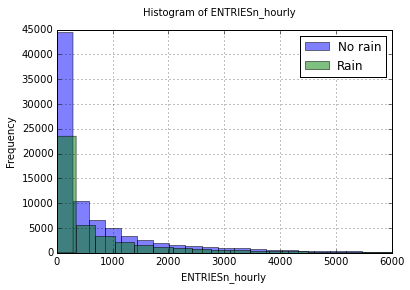

In [9]:
def entries_histogram(turnstile_weather):
    '''
    Before we perform any analysis, it might be useful to take a
    look at the data we're hoping to analyze. More specifically, let's 
    examine the hourly entries in our NYC subway data and determine what
    distribution the data follows. This data is stored in a dataframe
    called turnstile_weather under the ['ENTRIESn_hourly'] column.
    
    Let's plot two histograms on the same axes to show hourly
    entries when raining vs. when not raining. Here's an example on how
    to plot histograms with pandas and matplotlib:
    turnstile_weather['column_to_graph'].hist()
    
    '''
    df=turnstile_weather
    bins = 150
    alpha = 0.5
    xmin = ymin = 0
    xmax = 6000
    ymax = 45000

    plt.figure()

    df['ENTRIESn_hourly'][df['rain'] == 0].hist(bins=bins, alpha=alpha)
    df['ENTRIESn_hourly'][df['rain'] == 1].hist(bins=bins, alpha=alpha)

    plt.axis([xmin, xmax, ymin, ymax])
    plt.suptitle('Histogram of ENTRIESn_hourly')
    plt.xlabel('ENTRIESn_hourly')
    plt.ylabel('Frequency')
    plt.legend(['No rain', 'Rain'])

    return plt

entries_histogram(turnstile_weather)
    

via graph we can see that graph is not normally distributed so applying t-test is not good fit.

In [56]:
import scipy
import scipy.stats
import numpy

In [68]:
def mann_whitney_plus_mean(turnstile_weather):
    '''
    This function will consume the turnstile_weather dataframe containing
    our final turnstile weather data. 
    
    You will want to take the means and run the Mann Whitney U-test on the 
    ENTRIESn_hourly column in the turnstile_weather dataframe.
    
    This function should return:
        1) the mean of entries with rain
        2) the mean of entries without rain
        3) the Mann-Whitney U-statistic and p-value comparing the number of entries
           with rain and the number of entries without rain
    
    '''
    df=turnstile_weather
    df_wet = df['ENTRIESn_hourly'][df['rain'] == 1] # 44104
    df_dry = df['ENTRIESn_hourly'][df['rain'] == 0] # 87847

    with_rain_mean = df_wet.mean()
    without_rain_mean = df_dry.mean()

    U, p = scipy.stats.mannwhitneyu(df_wet, df_dry)
    
    return with_rain_mean, without_rain_mean, U, p

rain_mean,no_rain_mean,U,p=mann_whitney_plus_mean(turnstile_weather)

print 'rain_mean    (%s)'%(rain_mean)
print 'no_rain_mean (%s)'%(no_rain_mean)
print 'statistic    (%s)'%(U)
print 'p-vaue       (%s)'%(p)

rain_mean    (1105.44637675)
no_rain_mean (1090.27878015)
statistic    (1924409167.0)
p-vaue       (0.0249999127935)


As per the p-value(0.025) we can say with high level of certanity that more people ride the NYC Subway when it is raining. 

##### Linear Regression....

In [70]:
from ggplot import *

In this question, you need to:
1. implement the compute_cost() and gradient_descent() procedures
2. Select features (in the predictions procedure) and make predictions.

In [72]:
def normalize_features(df):
    """
    Normalize the features in the data set.
    """
    mu=df.mean()
    sigma=df.std()
    
    if (sigma==0).any():
        raise Exception("One or more features had the same value for all samples, and thus could " + \
                         "not be normalized. Please do not include features with only a single value " + \
                         "in your model.")
    df_normalized=(df-mu)/sigma
    
    return df_normalized,mu,sigma    

In [79]:
def compute_cost(features,values,theta):
    """
    Compute the cost function given a set of features / values, 
    and the values for our thetas.
    """
    m=len(values)
    
    SOSE=np.square(np.dot(features,theta)-values).sum()
    cost=SOSE/(2*m)
    
    return cost

In [80]:
def gradient_descent(features,values,theta,alpha,num_iterations):
    """
    Perform gradient descent given a data set with an arbitrary number of features.
    
    This can be the same gradient descent code as in the lesson #3 exercises,
    but feel free to implement your own.
    """
    m=len(values)
    cost_history=[]
    
    for i in range(num_iterations):
        predicted_values=np.dot(features,theta)
        theta-=alpha/m*np.dot(predicted_values-values,features)
        cost_history.append(compute_cost(features,values,theta))
        
    return theta,pandas.Series(cost_history)    
    

In [81]:
def plot_cost_history(alpha, cost_history):
    """
       This function is for viewing the plot of your cost history.
       You can run it by uncommenting this

       plot_cost_history(alpha, cost_history) 

       call in predictions.
   
    """
    cost_df = pandas.DataFrame({
      'Cost_History': cost_history,
      'Iteration': range(len(cost_history))})
    
    return ggplot(cost_df, aes('Iteration', 'Cost_History')) + \
           geom_point() + ggtitle('Cost History for alpha = %.3f' % alpha )


R^2 value is (0.458044314039) 


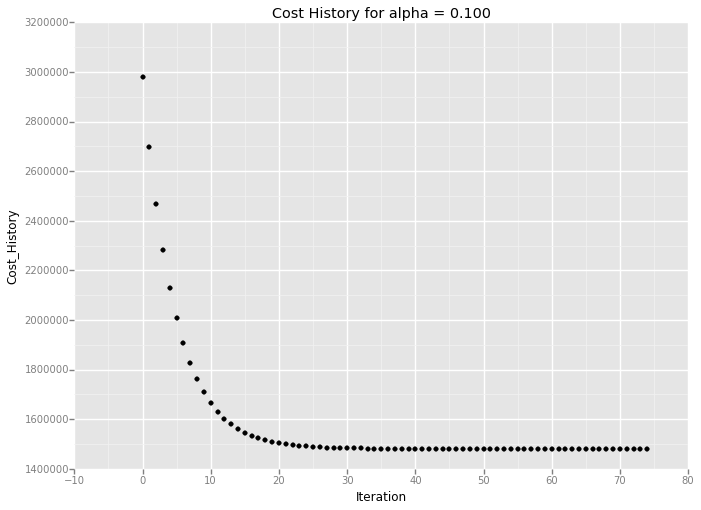

<ggplot: (8767276268085)>


In [85]:
def predictions(dataframe):
    '''
    The NYC turnstile data is stored in a pandas dataframe called turnstile_weather.
    Using the information stored in the dataframe, let's predict the ridership of
    the NYC subway using linear regression with gradient descent.
    
    Your prediction should have a R^2 value of 0.40 or better.
    You need to experiment using various input features contained in the dataframe. 
    We recommend that you don't use the EXITSn_hourly feature as an input to the 
    linear model because we cannot use it as a predictor: we cannot use exits 
    counts as a way to predict entry counts. 
    
    '''
    # Select Features (try different features!)
    features = dataframe[['rain', 'precipi', 'Hour', 'meantempi']]
    
    # Add UNIT to features using dummy variables
    dummy_units = pandas.get_dummies(dataframe['UNIT'], prefix='unit')
    features = features.join(dummy_units)
    
    # Values
    values = dataframe['ENTRIESn_hourly']
    m = len(values)

    features, mu, sigma = normalize_features(features)
    features['ones'] = np.ones(m) # Add a column of 1s (y intercept)
    
    # Convert features and values to numpy arrays
    features_array = np.array(features)
    values_array = np.array(values)

    # Set values for alpha, number of iterations.
    alpha = 0.1 # please feel free to change this value
    num_iterations = 75 # please feel free to change this value

    # Initialize theta, perform gradient descent
    theta_gradient_descent = np.zeros(len(features.columns))
    theta_gradient_descent, cost_history = gradient_descent(features_array, 
                                                            values_array, 
                                                            theta_gradient_descent, 
                                                            alpha, 
                                                            num_iterations)
    
    plot = None
    # -------------------------------------------------
    # Uncomment the next line to see your cost history
    # -------------------------------------------------
    plot = plot_cost_history(alpha, cost_history)
    # 
    # Please note, there is a possibility that plotting
    # this in addition to your calculation will exceed 
    # the 30 second limit on the compute servers.
    
    predictions = np.dot(features_array, theta_gradient_descent)
    return predictions, plot

predictions,plot=predictions(turnstile_weather)

print "R^2 value is (%s) "%(1-(np.square(turnstile_weather.ENTRIESn_hourly-predictions).sum()/ \
                               np.square(turnstile_weather.ENTRIESn_hourly-turnstile_weather.ENTRIESn_hourly.mean()).sum()))
print plot

<module 'matplotlib.pyplot' from '/root/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

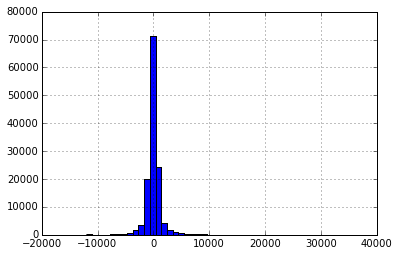

In [87]:
def plot_residuals(turnstile_weather, predictions):
    '''
    Using the same methods that we used to plot a histogram of entries
    per hour for our data, why don't you make a histogram of the residuals
    (that is, the difference between the original hourly entry data and the predicted values).
    Try different binwidths for your histogram.

    Based on this residual histogram, do you have any insight into how our model
    performed?  Reading a bit on this webpage might be useful:

    http://www.itl.nist.gov/div898/handbook/pri/section2/pri24.htm
    '''
    
    plt.figure()
    (turnstile_weather['ENTRIESn_hourly'] - predictions).hist(bins=50)
    return plt

plot_residuals(turnstile_weather,predictions)

In [88]:
import statsmodels.api as sm

In this optional exercise, you should complete the function called 
predictions(turnstile_weather). This function takes in our pandas 
turnstile weather dataframe, and returns a set of predicted ridership values,
based on the other information in the dataframe.  

You may also try using a reference implementation such as: 
http://statsmodels.sourceforge.net/devel/generated/statsmodels.regression.linear_model.OLS.html

One of the advantages of the statsmodels implementation is that it gives you
easy access to the values of the coefficients theta. This can help you infer relationships 
between variables in the dataset.

In [92]:
def own_predictions(weather_turnstile):
    #
    # Your implementation 
    # 
    X = weather_turnstile ['ENTRIESn_hourly']
    Y = weather_turnstile [['EXITSn_hourly']]
    model = sm.OLS( X, Y ).fit()
    prediction = model.predict(Y)
    return prediction

predictions=own_predictions(turnstile_weather)

print "R^2 value is (%s) "%(1-(np.square(turnstile_weather.ENTRIESn_hourly-predictions).sum()/ \
                               np.square(turnstile_weather.ENTRIESn_hourly-turnstile_weather.ENTRIESn_hourly.mean()).sum()))

R^2 value is (0.537593036541) 


## Visualization

##### Visualization part1....

In [11]:
from pandas import *
from ggplot import *
from datetime import *
from numpy import mean

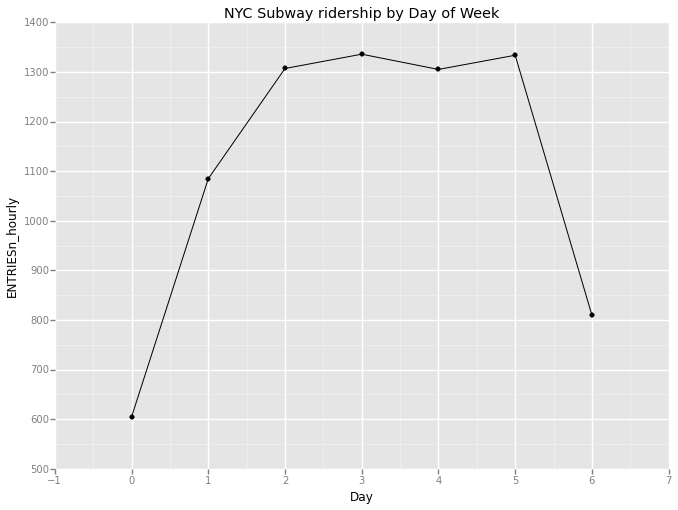

<ggplot: (8770704738233)>

In [12]:
def plot_weather_data(turnstile_weather):
    '''
    plots a histogram of entries by day of week
    '''
    
    
    df = turnstile_weather
    
    df['Day'] = df['DATEn'].map(lambda x:datetime.strptime(x, '%Y-%m-%d').strftime('%w'))
    
    agg = df.groupby(['Day'], as_index=False).aggregate(mean)

    plot = ggplot(agg, aes(x='Day', y='ENTRIESn_hourly')) + geom_line() +geom_point()+\
            ggtitle('NYC Subway ridership by Day of Week')
           
    return plot

plot_weather_data(turnstile_weather)

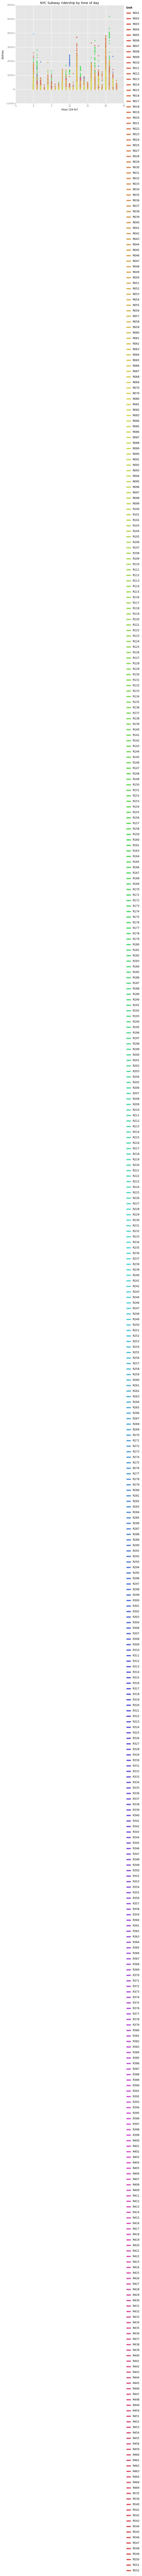

<ggplot: (8770704460961)>

In [13]:
def plot_weather_data_time(turnstile_weather):
    '''
    You are passed in a dataframe called turnstile_weather. 
    Use turnstile_weather along with ggplot to make a data visualization
    
    Here are some suggestions for things to investigate and illustrate:
     * Ridership by time of day or day of week
     * How ridership varies based on Subway station (UNIT)
     * Which stations have more exits or entries at different times of day
       (You can use UNIT as a proxy for subway station.)

    '''
    #print turnstile_weather.head(2)
    plot = ggplot(turnstile_weather, aes('Hour','ENTRIESn_hourly',color='UNIT')) +\
           geom_point()+\
           ggtitle('NYC Subway ridership by time of day') + xlab('Hour (24-hr)') + ylab('Entries')
    return plot

plot_weather_data_time(turnstile_weather)

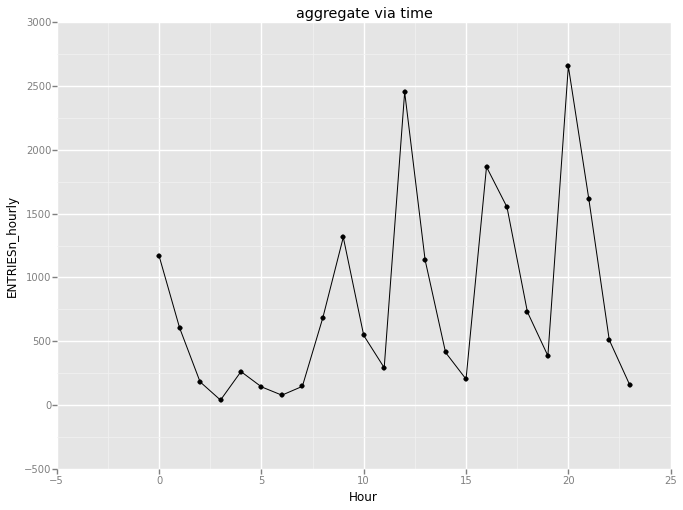

<ggplot: (8770689224877)>

In [14]:
def plot_weather_data_agg_time(turnstile_weather):
    '''
    plots a histogram of entries by day of week
    '''
    
    
    df = turnstile_weather
    
    agg = df.groupby(['Hour'], as_index=False).aggregate(mean)

    plot = ggplot(agg, aes(x='Hour', y='ENTRIESn_hourly')) + geom_line() +geom_point()+\
            ggtitle('aggregate via time')
           
    return plot

plot_weather_data_agg_time(turnstile_weather)